In [628]:
import numpy as np # working with arrays (vector) and matrices
import matplotlib.pyplot as plt # low-level visualization library
import seaborn as sns # high-level visualization library
import pandas as pd # data manipulation library
import random

# A simple real-world dataset
[Kaggle link (boston house prices)](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data) 

In [629]:
# please download the dataset from: 
# https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data
# and save it in the datasets folder (directly in the project folder)
df = pd.read_csv('../datasets/boston.csv') 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


For the sake of simplicity, we will try to predict the house price (MEDV - Median value of owner-occupied homes in $1000's [k$]) base only on its average number of rooms per dwelling (RM). And I will refer to these features as "price" and "number of room" for MEDV and RM respectively (See [Attribute Information](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data) for further details) 

In [630]:
def plot(inputs, outputs, predictions=None, is_show=True):
    plt.xlabel('Average number of rooms per dwelling')
    plt.ylabel('Median value of owner-occupied homes in $1000s')
    plt.scatter(inputs, outputs)
    if predictions is not None:
        plt.plot(inputs, predictions, color='red')
    if is_show:
        plt.show()

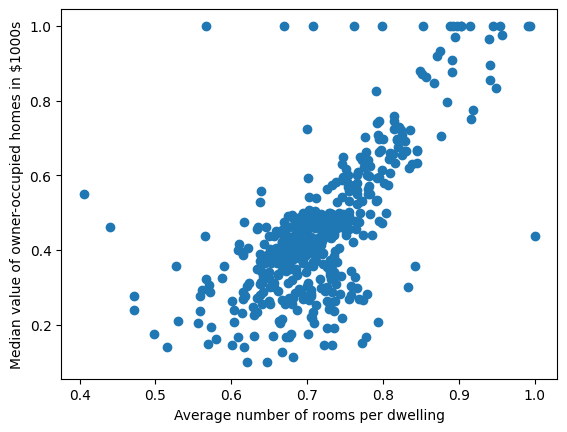

In [631]:
rooms = df["RM"].values
true_prices = df["MEDV"].values

rooms /= rooms.max()
true_prices /= true_prices.max()

plot(rooms, true_prices)

## Introduction to Linear Regression
From the data above, if a house has 7 rooms what would be the estimated price? For us, we can see that it should be somewhere around 30,000$. This is because we can clearly see the trend in the data. The main idea of regression problem is to look for trends in data and using them to predict any future inputs. Specifically, we will focuse on linear regression. 


The trend in the above dataset would look something like the following:

Good m:  1.5983303370952626
Good b:  -0.6934124155287712


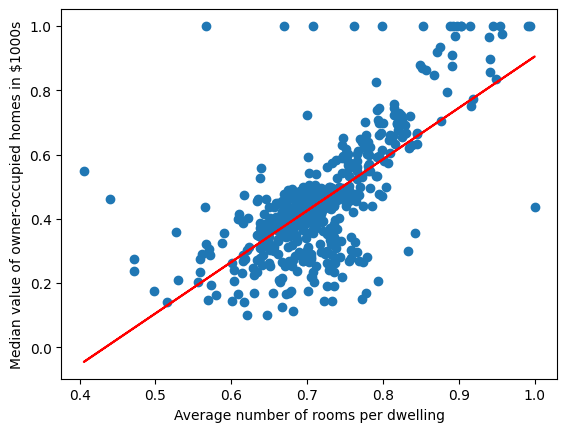

In [632]:
def predict(rooms, m, b):
    return m * rooms + b # y = mx + b

good_m, good_b = np.polyfit(rooms, true_prices, 1) # create a line using numpy's built-in poly fit function
print("Good m: ", good_m)
print("Good b: ", good_b)

plot(rooms, true_prices, predict(rooms, good_m, good_b))

The red line above was created with slope and y-intercept (m and b) from numpy's built-in poly-fit function. A straight line is not perfect for real-world data but it is simple enough to represent trend in linear-ish data. Regardless, we will try to implement our own algorithm to find linear trends in the same dataset.

# Naive implementation

Initial m:  0.425095448548629
Initial b:  0.8979226750917779


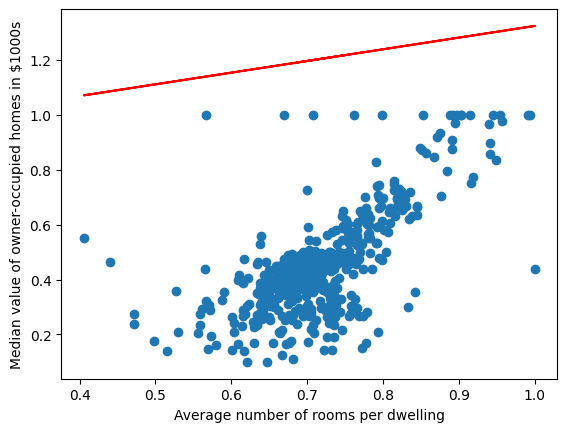

In [633]:
# our custom m and b set to random values initially
m = random.random()
b = random.random()

print("Initial m: ", m)
print("Initial b: ", b)

predictions = predict(rooms, m, b)
plot(rooms, true_prices, predictions)

In [634]:
def totalLoss(predictions, targets):
    return np.sum((predictions - targets) ** 2) / 2

In [635]:
predictions = predict(rooms, m, b)
print("Initial loss: ", totalLoss(predictions, true_prices))

Initial loss:  149.53777693220104


In [636]:
def calculateBetterParameters(inputs, targets, m, b, learning_rate):
    outputs = predict(inputs, m, b)
    change_in_loss_wrt_predictions = outputs - targets # dloss/dy

    change_in_loss_wrt_m = change_in_loss_wrt_predictions * inputs # dloss/dm
    change_in_loss_wrt_b = change_in_loss_wrt_predictions * 1 # dloss/db

    new_m = m - learning_rate * change_in_loss_wrt_m.sum()
    new_b = b - learning_rate * change_in_loss_wrt_b.sum()

    return new_m, new_b

Final loss:  4.464704843950545


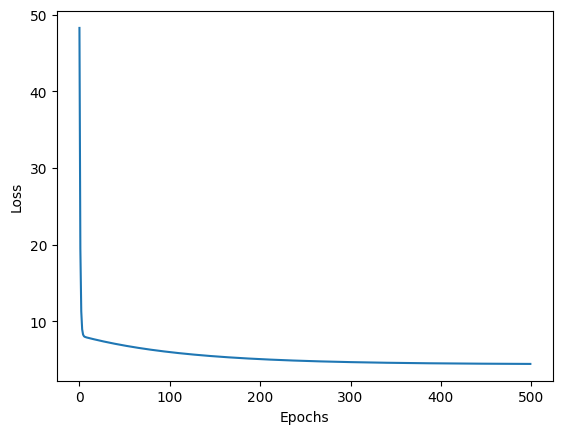

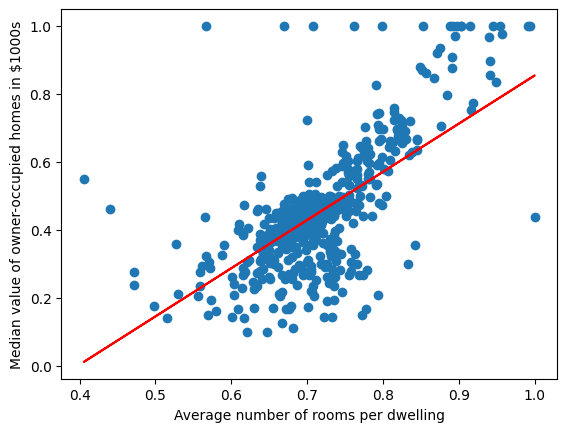

In [637]:
epochs = 500
loss_history = []

for i in range(epochs):
    m, b = calculateBetterParameters(rooms, true_prices, m, b, 0.002) # update m and b
    predictions = predict(rooms, m, b)
    loss_history.append(totalLoss(predictions, true_prices))

print("Final loss: ", loss_history[-1])
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plot(rooms, true_prices, predictions) # plot the final predictions (custom m and b)

# General/formal form and implementation

(coming soon)